In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
diabetes=pd.read_csv("C:\\Users\\loges\\Downloads\\diabetes.csv")

In [4]:
#Checking summary statistics
diab_df=pd.DataFrame(diabetes)
diab_df.head()
diab_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
y=diab_df['Outcome']
x_uns=diab_df.drop('Outcome',axis=1)



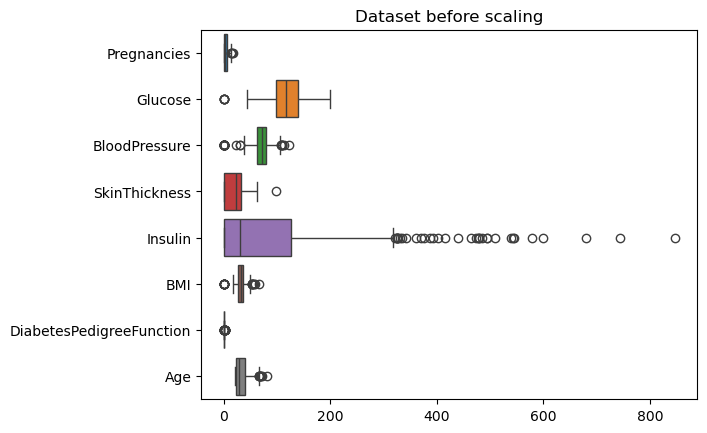

In [6]:
sns.boxplot(data=x_uns, orient='h')
plt.title("Dataset before scaling")
plt.show()

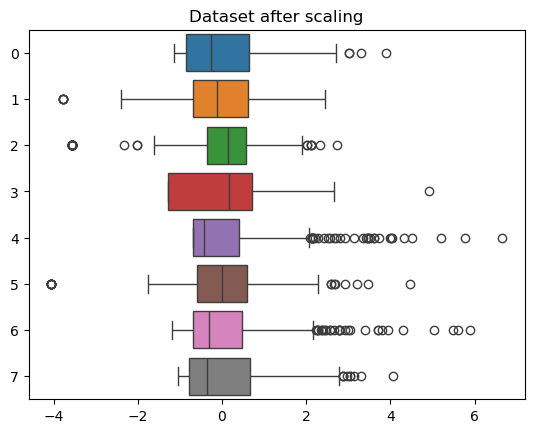

In [7]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x_uns)
sns.boxplot(data=x, orient='h')
plt.title("Dataset after scaling")
plt.show()

In [8]:
#Splitting into test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

In [9]:
#Logistic regression from scratch

def train_logistic_regression(x_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        x0 = np.ones((x_train.shape[0], 1))
        x_train = np.hstack((x0, x_train))

    # Create weights matrix
    weights = np.zeros(x_train.shape[1])

    # Iterate through the observations and update weights
    for iteration in range(max_iter):
        update_weights(x_train, y_train, weights, learning_rate)
        # Display cost once in 100 iterations
        if iteration % 100 == 0: 
            cost = compute_cost(x_train, y_train, weights)
            print(f"Iteration {iteration}: Cost = {cost:.4f}")

    return weights

#Function to update weights
def update_weights(x_train, y_train, weights, learning_rate):
    predictions = predict(x_train, weights)
    delta_weight = np.dot(x_train.T, y_train - predictions) / x_train.shape[0]
    weights += learning_rate * delta_weight
    return weights

#Prediction Function
def predict(x, weights):
    z = np.dot(x, weights)
    probabilities = sigmoid(z)
    return probabilities

#Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Cost function with cross entropy
def compute_cost(x, y, weights):
    predictions = predict(x, weights)
    cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost



In [10]:
weights = train_logistic_regression(x_train,y_train, max_iter = 2000, learning_rate = 0.001)
y_pred = predict(x_test, weights)


Iteration 0: Cost = 0.6930
Iteration 100: Cost = 0.6826
Iteration 200: Cost = 0.6730
Iteration 300: Cost = 0.6642
Iteration 400: Cost = 0.6561
Iteration 500: Cost = 0.6486
Iteration 600: Cost = 0.6417
Iteration 700: Cost = 0.6354
Iteration 800: Cost = 0.6295
Iteration 900: Cost = 0.6240
Iteration 1000: Cost = 0.6189
Iteration 1100: Cost = 0.6142
Iteration 1200: Cost = 0.6098
Iteration 1300: Cost = 0.6057
Iteration 1400: Cost = 0.6018
Iteration 1500: Cost = 0.5982
Iteration 1600: Cost = 0.5948
Iteration 1700: Cost = 0.5917
Iteration 1800: Cost = 0.5887
Iteration 1900: Cost = 0.5859


In [11]:
predictions = [1 if p > 0.5 else 0 for p in y_pred]
print("Predictions:", predictions)

Predictions: [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]


In [12]:
#Computing metrics of scratch model.
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix,classification_report
print("----------Metrics of Scratch Model----------- ")
print("R-square value: ", r2_score(y_test, y_pred))
print("MSE value: ",mean_squared_error(y_test, y_pred))



----------Metrics of Scratch Model----------- 
R-square value:  0.1082850181241427
MSE value:  0.20303849309030317


In [13]:
#Logistic Regression of sklearn model.

from sklearn.linear_model import LogisticRegression
log_model2=LogisticRegression(max_iter=2000)
log_model2.fit(x_train,y_train)
pred2=log_model2.predict(x_test)
print('----------Metrics of Sklearn Model----------- ')
print("R-square value: ", r2_score(y_test, pred2))
print("MSE value: ",mean_squared_error(y_test, pred2))



----------Metrics of Sklearn Model----------- 
R-square value:  -0.12172839506172828
MSE value:  0.2554112554112554


Answer: Based on the R-square and MSE metrics the scratch model we developed performs marginally better than sklearn model with iteration rate set as 2000 for both the models. The higher R square denotes better fit of data for the scratch model.